In [532]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

lol = pd.read_csv('League of Legends 2021 World Championship Play-In Groups Statistics - Raw Data.csv')
lol

,Team,Player,Opponent,Position,Champion,Kills,Deaths,Assists,Creep Score,Gold Earned,Champion Damage Share,Kill Participation,Wards Placed,Wards Destroyed,Ward Interactions,Dragons For,Dragons Against,Barons For,Barons Against,Result
0,UOL,Boss,GS,Top,Camille,4,5,3,188,11107,0.17,0.78,8,8,16,0,4,0,1,L
1,GS,Crazy,UOL,Top,Gwen,3,1,9,217,12201,0.20,0.52,10,7,17,4,0,1,0,W
2,UOL,Ahahacik,GS,Jungle,Trundle,2,4,5,156,9048,0.15,0.78,8,14,22,0,4,0,1,L
3,GS,Mojito,UOL,Jungle,Talon,5,4,10,194,11234,0.23,0.65,12,8,20,4,0,1,0,W
4,UOL,Nomanz,GS,Mid,Leblanc,1,3,4,216,9245,0.29,0.56,6,9,15,0,4,0,1,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,BYG,Maoan,UOL,Mid,Ryze,4,4,2,356,15558,0.23,0.32,24,6,30,4,1,1,1,W
216,UOL,Argonavt,BYG,Adc,Senna,1,3,9,58,9554,0.16,0.71,35,16,51,1,4,1,1,L
217,BYG,Doggo,UOL,Adc,Draven,10,2,4,353,20546,0.38,0.74,15,5,20,4,1,1,1,W
218,UOL,Santas,BYG,Support,Wukong,0,4,7,200,10354,0.11,0.50,16,8,24,1,4,1,1,L


In [533]:
lol.describe()

,Kills,Deaths,Assists,Creep Score,Gold Earned,Champion Damage Share,Kill Participation,Wards Placed,Wards Destroyed,Ward Interactions,Dragons For,Dragons Against,Barons For,Barons Against
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,2.709091,2.718182,5.668182,200.340909,11008.159091,0.200000,0.608273,19.454545,8.704545,28.159091,2.090909,2.090909,0.545455,0.545455
std,2.579673,1.747179,3.888149,101.328153,3198.806207,0.095051,0.190404,15.713553,5.101614,18.051857,1.381849,1.381849,0.657050,0.657050
min,0.000000,0.000000,0.000000,14.000000,4714.000000,0.040000,0.000000,3.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,3.000000,156.000000,8691.250000,0.130000,0.500000,10.000000,5.000000,17.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,3.000000,5.000000,210.000000,10454.500000,0.205000,0.625000,14.000000,7.000000,22.000000,2.000000,2.000000,0.000000,0.000000
75%,4.000000,4.000000,8.000000,266.250000,13431.750000,0.260000,0.740000,19.000000,12.000000,30.500000,3.250000,3.250000,1.000000,1.000000
max,13.000000,7.000000,19.000000,419.000000,20546.000000,0.470000,1.000000,92.000000,30.000000,112.000000,4.000000,4.000000,2.000000,2.000000


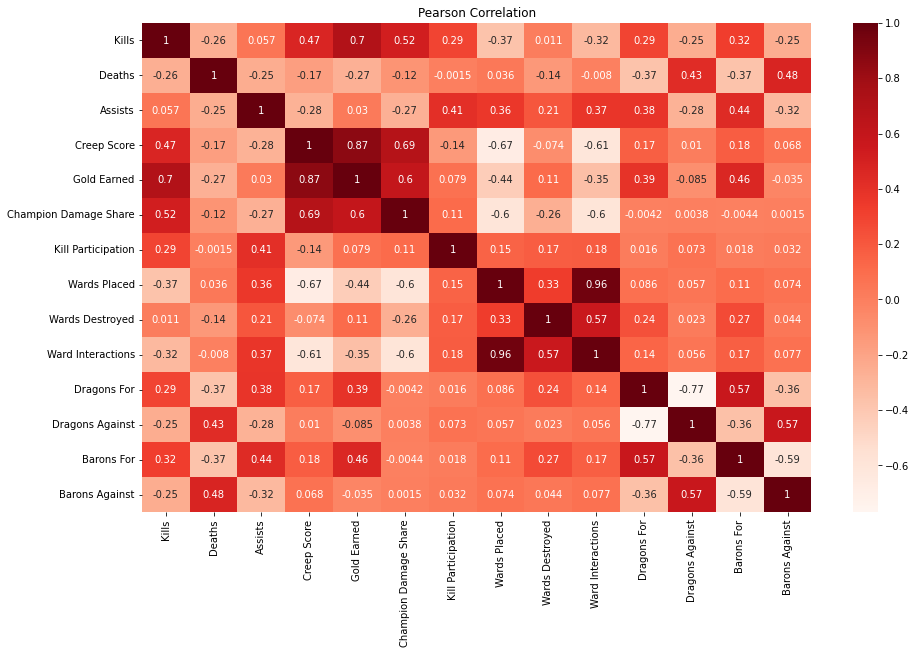

In [534]:
#heatmap correlation
plt.figure(figsize = (15,9))
sns.heatmap(lol.corr(), annot = True, cmap = 'Reds')
plt.title("Pearson Correlation")
plt.show()

In [535]:
df = pd.DataFrame(lol)
df['Team'] = df['Team'].astype('category')
df['Player'] = df['Player'].astype('category')
df['Position'] = df['Position'].astype('category')
df['Champion'] = df['Champion'].astype('category')
df['Opponent'] = df['Opponent'].astype('category')
df['Result'] = df['Result'].astype('category')
print(df.dtypes)

Team                     category
Player                   category
Opponent                 category
Position                 category
Champion                 category
Kills                       int64
Deaths                      int64
Assists                     int64
Creep Score                 int64
Gold Earned                 int64
Champion Damage Share     float64
Kill Participation        float64
Wards Placed                int64
Wards Destroyed             int64
Ward Interactions           int64
Dragons For                 int64
Dragons Against             int64
Barons For                  int64
Barons Against              int64
Result                   category
dtype: object


In [536]:
team_result = lol.groupby(['Team', 'Result']).size().reset_index(name = 'Count')
team_result['Count'] = team_result['Count'] / 5
print(team_result)

   Team Result  Count
0   BYG      L    3.0
1   BYG      W    2.0
2    C9      L    2.0
3    C9      W    3.0
4   DFM      L    1.0
5   DFM      W    4.0
6    GS      L    2.0
7    GS      W    2.0
8   HLE      L    1.0
9   HLE      W    3.0
10  INF      L    4.0
11  INF      W    0.0
12  LNG      L    0.0
13  LNG      W    4.0
14  PCE      L    2.0
15  PCE      W    2.0
16  RED      L    3.0
17  RED      W    1.0
18  UOL      L    4.0
19  UOL      W    1.0


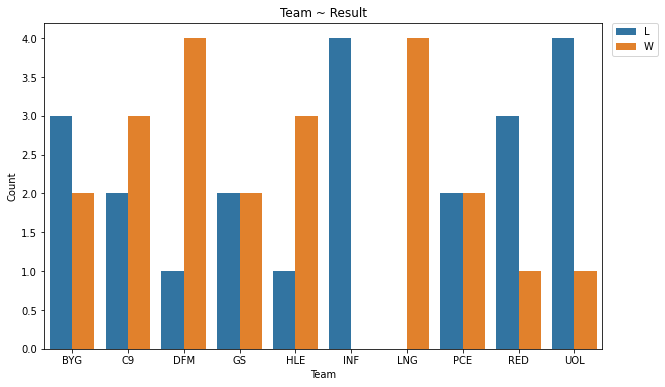

In [499]:
#visualize team ~ result
plt.figure(figsize = (10,6))
sns.barplot(x = 'Team', y = 'Count', hue = 'Result', data = team_result)
plt.title("Team ~ Result")
plt.legend(bbox_to_anchor = (1.1,1), borderaxespad = 0)
plt.show()

<AxesSubplot:xlabel='Team', ylabel='Count'>

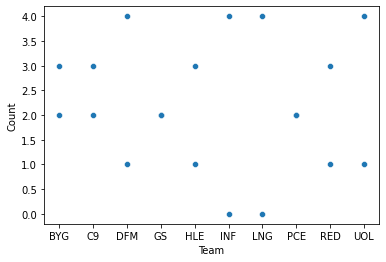

In [520]:
sns.scatterplot(data=team_result, y="Count", x="Team")


In [500]:
champ = lol.groupby(['Champion' , 'Result']).size().reset_index(name = 'Count')
print(champ)

    Champion Result  Count
0     Aatrox      L      1
1     Aatrox      W      1
2      Akali      L      0
3      Akali      W      1
4    Alistar      L      1
..       ...    ...    ...
129     Yone      W      0
130      Zed      L      1
131      Zed      W      1
132      Zoe      L      2
133      Zoe      W      1

[134 rows x 3 columns]


<AxesSubplot:xlabel='Result', ylabel='Kills'>

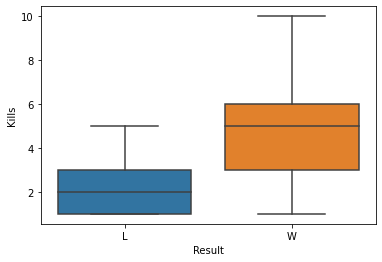

In [517]:
sns.boxplot(y="Kills", x="Result", data=df, showfliers= False)

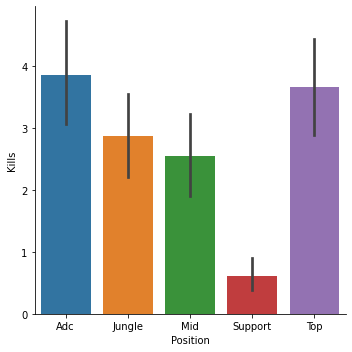

In [502]:
b = sns.catplot(y="Kills", x="Position" , data=df , kind="bar")

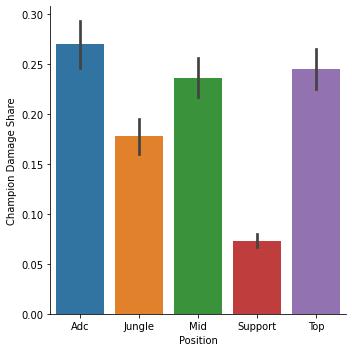

In [503]:
b = sns.catplot(y="Champion Damage Share", x="Position" , data=df , kind="bar")

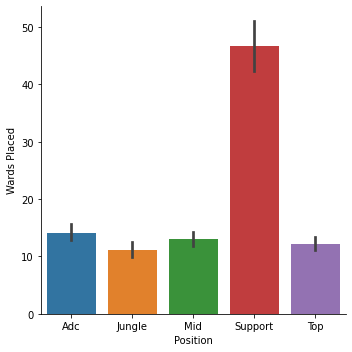

In [504]:
b = sns.catplot(y="Wards Placed", x="Position" , data=df , kind="bar")

In [505]:
test = df.groupby(['Player']).mean()
test = test.sort_values('Kills', ascending = False)
test.reset_index(level=0, inplace=True)


In [506]:

indexNames = df[(df['Position'] == 'Support') | (df['Kills'] == 0) ].index
df.drop(indexNames , inplace=True)

In [507]:
data = df.loc[(df["Position"] != "Support") | (df["Kills"] != 0 )]

<AxesSubplot:xlabel='Kill Participation', ylabel='Champion Damage Share'>

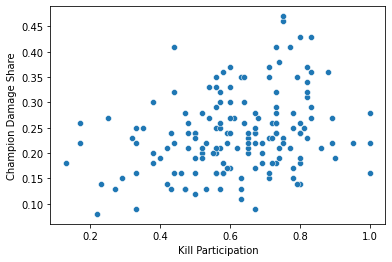

In [508]:
sns.scatterplot(data=data, y="Champion Damage Share", x="Kill Participation")


<AxesSubplot:xlabel='Kill Participation', ylabel='Deaths'>

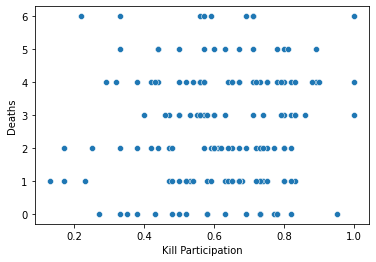

In [516]:
sns.scatterplot(data=data, y="Deaths", x="Kill Participation")


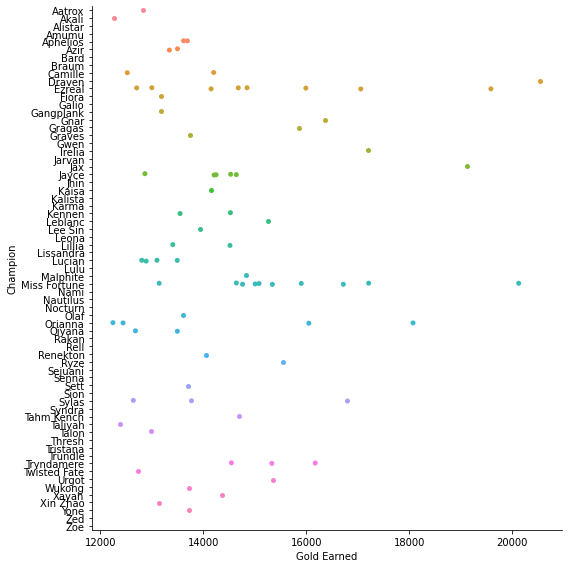

In [509]:
a = df['Gold Earned'].mean()
gold = df[df['Gold Earned'] > a]
b = sns.catplot(y="Champion", x="Gold Earned" , data=gold , height=8)

In [510]:
lol

,Team,Player,Opponent,Position,Champion,Kills,Deaths,Assists,Creep Score,Gold Earned,Champion Damage Share,Kill Participation,Wards Placed,Wards Destroyed,Ward Interactions,Dragons For,Dragons Against,Barons For,Barons Against,Result
0,UOL,Boss,GS,Top,Camille,4,5,3,188,11107,0.17,0.78,8,8,16,0,4,0,1,L
1,GS,Crazy,UOL,Top,Gwen,3,1,9,217,12201,0.20,0.52,10,7,17,4,0,1,0,W
2,UOL,Ahahacik,GS,Jungle,Trundle,2,4,5,156,9048,0.15,0.78,8,14,22,0,4,0,1,L
3,GS,Mojito,UOL,Jungle,Talon,5,4,10,194,11234,0.23,0.65,12,8,20,4,0,1,0,W
4,UOL,Nomanz,GS,Mid,Leblanc,1,3,4,216,9245,0.29,0.56,6,9,15,0,4,0,1,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,BYG,Maoan,UOL,Mid,Ryze,4,4,2,356,15558,0.23,0.32,24,6,30,4,1,1,1,W
216,UOL,Argonavt,BYG,Adc,Senna,1,3,9,58,9554,0.16,0.71,35,16,51,1,4,1,1,L
217,BYG,Doggo,UOL,Adc,Draven,10,2,4,353,20546,0.38,0.74,15,5,20,4,1,1,1,W
218,UOL,Santas,BYG,Support,Wukong,0,4,7,200,10354,0.11,0.50,16,8,24,1,4,1,1,L


In [512]:
sup = lol[lol['Position'] == 'Support' ]
sup['Ward Interactions'].mean()
indexNames = sup[(sup['Ward Interactions'] > sup['Ward Interactions'].mean())].index

lol.drop(indexNames , inplace=True)


,Team,Player,Opponent,Position,Champion,Kills,Deaths,Assists,Creep Score,Gold Earned,Champion Damage Share,Kill Participation,Wards Placed,Wards Destroyed,Ward Interactions,Dragons For,Dragons Against,Barons For,Barons Against,Result
8,UOL,Santas,GS,Support,Amumu,1,6,4,41,6328,0.07,0.56,40,10,50,0,4,0,1,L
9,GS,Zergsting,UOL,Support,Rakan,0,2,16,42,7395,0.05,0.70,36,6,42,4,0,1,0,W
18,DFM,Gaeng,C9,Support,Alistar,0,4,2,27,5451,0.08,0.50,45,6,51,0,4,0,1,L
19,C9,Bulcan,DFM,Support,Leona,1,1,9,30,7332,0.09,0.77,49,8,57,4,0,1,0,W
58,LNG,Iwandy,PCE,Support,Leona,0,1,5,45,5785,0.04,0.33,34,14,48,2,1,0,0,W
59,PCE,Aladoric,LNG,Support,Amumu,0,3,4,29,4859,0.07,0.80,32,2,34,1,2,0,0,L
89,GS,Zersting,C9,Support,Thresh,0,4,5,29,5746,0.06,0.56,39,7,46,2,2,0,1,L
98,BYG,Kino,UOL,Support,Rakan,0,2,14,37,6957,0.04,0.74,32,13,45,1,1,1,0,W
99,UOL,Santas,BYG,Support,Nautilus,0,4,2,37,4985,0.07,0.29,31,4,35,1,1,0,1,L
109,DFM,Gaeng,GS,Support,Thresh,3,0,13,25,8059,0.09,0.94,35,4,39,4,0,1,0,W


#  Avant >

C:\Users\quent\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<Figure size 1080x1080 with 0 Axes>

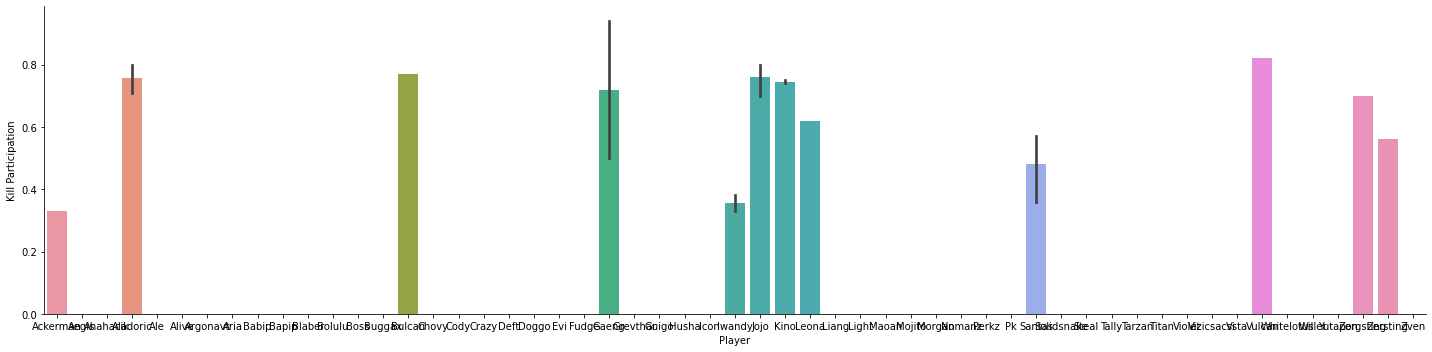

In [514]:

indexNames = sup[(sup['Ward Interactions'] == sup['Ward Interactions'].mean())].index
sup.drop(indexNames , inplace=True)

plt.figure(figsize=(15,15))
sns.catplot(y="Kill Participation", x="Player", data=sup , kind="bar" , aspect=4);

In [ ]:
df2 = df.groupby(['Player'])

In [147]:
for key, item in df2:
    print(df2.get_group(key), "\n\n")

    Team    Player Opponent Position Champion  Kills  Deaths  Assists  \
49   INF  Ackerman      HLE  Support    Amumu      0       3        4   
68   INF  Ackerman      RED  Support     Nami      0       2        5   
138  INF  Ackerman      PCE  Support    Rakan      0       2       12   
199  INF  Ackerman      LNG  Support    Braum      0       3        1   

     Creep Score  Gold Earned  ...  Wards Destroyed  Ward Interactions  \
49            35         6137  ...               12                 59   
68            21         6744  ...               18                 61   
138           51         7715  ...               21                 83   
199           28         4714  ...                6                 45   

     Dragons For  Dragons Against  Barons For  Barons Against  Result  games  \
49             1                3           0               1       L      1   
68             3                2           0               1       L      2   
138            0       

    Team  Player Opponent Position      Champion  Kills  Deaths  Assists  \
57   PCE  Violet      LNG      Adc  Miss Fortune      2       2        2   
137  PCE  Violet      INF      Adc         Xayah      3       1        7   
156  PCE  Violet      HLE      Adc      Tristana      1       4        3   
186  PCE  Violet      RED      Adc        Lucian      8       4       10   

     Creep Score  Gold Earned  ...  Wards Destroyed  Ward Interactions  \
57           207         8409  ...                8                 20   
137          342        14369  ...                8                 19   
156          220         9588  ...               10                 22   
186          245        12893  ...               13                 25   

     Dragons For  Dragons Against  Barons For  Barons Against  Result  games  \
57             1                2           0               0       L      1   
137            4                0           1               0       W      2   
156     

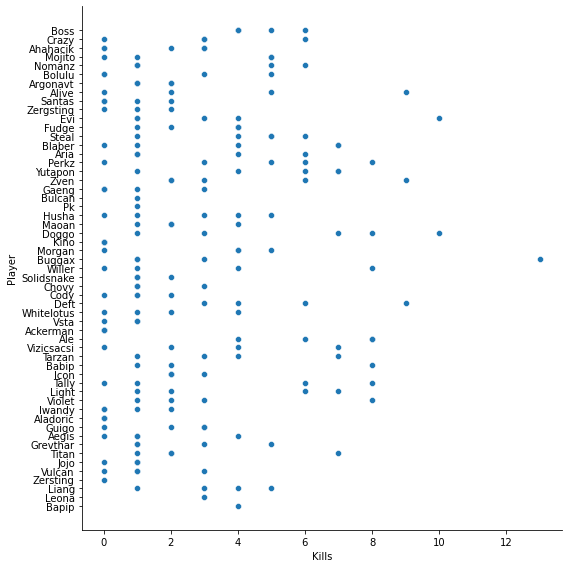

In [128]:
sns.relplot(data = df , y ="Player" , x='Kills' , height=8)

In [129]:
df['games'] = df.groupby("Player").cumcount()+1


In [130]:
df

,Team,Player,Opponent,Position,Champion,Kills,Deaths,Assists,Creep Score,Gold Earned,...,Kill Participation,Wards Placed,Wards Destroyed,Ward Interactions,Dragons For,Dragons Against,Barons For,Barons Against,Result,games
0,UOL,Boss,GS,Top,Camille,4,5,3,188,11107,...,0.78,8,8,16,0,4,0,1,L,1
1,GS,Crazy,UOL,Top,Gwen,3,1,9,217,12201,...,0.52,10,7,17,4,0,1,0,W,1
2,UOL,Ahahacik,GS,Jungle,Trundle,2,4,5,156,9048,...,0.78,8,14,22,0,4,0,1,L,1
3,GS,Mojito,UOL,Jungle,Talon,5,4,10,194,11234,...,0.65,12,8,20,4,0,1,0,W,1
4,UOL,Nomanz,GS,Mid,Leblanc,1,3,4,216,9245,...,0.56,6,9,15,0,4,0,1,L,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,BYG,Maoan,UOL,Mid,Ryze,4,4,2,356,15558,...,0.32,24,6,30,4,1,1,1,W,5
216,UOL,Argonavt,BYG,Adc,Senna,1,3,9,58,9554,...,0.71,35,16,51,1,4,1,1,L,5
217,BYG,Doggo,UOL,Adc,Draven,10,2,4,353,20546,...,0.74,15,5,20,4,1,1,1,W,5
218,UOL,Santas,BYG,Support,Wukong,0,4,7,200,10354,...,0.50,16,8,24,1,4,1,1,L,5


In [123]:
df["kill_avg"] = df.groupby("Player").sum().mean()

In [48]:

test = df.groupby(['Player' , 'Position']).mean()

In [55]:
avg = test['Kills'].mean()
avgd = test['Deaths'].mean()
test = test.drop( test[ (test['Kills'] < avg) | (test['Deaths'] < avgd) ].index)

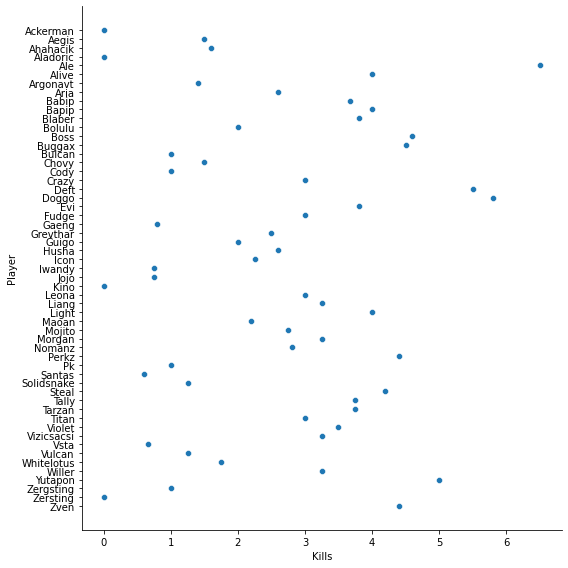

In [28]:
sns.relplot(data =test, y="Player" ,  x='Kills', height=8)

In [240]:
test

,,Kills,Deaths,Assists,Creep Score,Gold Earned,Champion Damage Share,Kill Participation,Wards Placed,Wards Destroyed,Ward Interactions,Dragons For,Dragons Against,Barons For,Barons Against,games,kill_avg,test
Player,Position,,,,,,,,,,,,,,,,,
Alive,Adc,4.0,3.25,3.5,274.75,12462.0,0.2475,0.5650,13.75,8.75,22.5,2.00,2.25,0.5,0.50,2.5,NaN,NaN
Bapip,Jungle,4.0,5.00,1.0,162.00,9729.0,0.3700,0.7100,6.00,11.00,17.0,0.00,4.00,0.0,1.00,1.0,NaN,NaN
Boss,Top,4.6,4.20,3.8,204.40,11601.6,0.2340,0.7900,10.80,5.40,16.2,1.20,2.80,0.2,1.00,3.0,NaN,NaN
Buggax,Top,4.5,3.00,1.0,243.75,11761.5,0.3275,0.5175,11.50,4.50,16.0,1.25,2.75,0.0,0.75,2.5,NaN,NaN


In [346]:
data.head(50)

,Team,Player,Opponent,Position,Champion,Kills,Deaths,Assists,Creep Score,Gold Earned,Champion Damage Share,Kill Participation,Wards Placed,Wards Destroyed,Ward Interactions,Dragons For,Dragons Against,Barons For,Barons Against,Result
0,UOL,Boss,GS,Top,Camille,4,5,3,188,11107,0.17,0.78,8,8,16,0,4,0,1,L
1,GS,Crazy,UOL,Top,Gwen,3,1,9,217,12201,0.20,0.52,10,7,17,4,0,1,0,W
2,UOL,Ahahacik,GS,Jungle,Trundle,2,4,5,156,9048,0.15,0.78,8,14,22,0,4,0,1,L
3,GS,Mojito,UOL,Jungle,Talon,5,4,10,194,11234,0.23,0.65,12,8,20,4,0,1,0,W
4,UOL,Nomanz,GS,Mid,Leblanc,1,3,4,216,9245,0.29,0.56,6,9,15,0,4,0,1,L
5,GS,Bolulu,UOL,Mid,Twisted Fate,5,0,13,205,12737,0.25,0.78,17,1,18,4,0,1,0,W
6,UOL,Argonavt,GS,Adc,Ezreal,1,5,3,202,9539,0.32,0.44,7,2,9,0,4,0,1,L
7,GS,Alive,UOL,Adc,Miss Fortune,9,2,5,273,15085,0.27,0.61,15,5,20,4,0,1,0,W
10,DFM,Evi,C9,Top,Gnar,1,4,2,191,8931,0.23,0.75,10,4,14,0,4,0,1,L
11,C9,Fudge,DFM,Top,Irelia,1,2,4,263,11834,0.18,0.38,14,4,18,4,0,1,0,W
